# Warm-Up - MultiLayer Perceptron Classifier
In this excercise we will go through scikit-learn high level modeling, as well as TensorFlow computational model. We will go through TensorFlow advanced modeling in the next notebook.

### Load the data
As a step before running the training and machine learning model, we need to load the data. We will use `sklearn.datasets` to get a sample dataset. [Check this link for details](http://scikit-learn.org/stable/datasets/).
The data should have two parts:
- `X` - array-like data with `shape = (n_samples, n_features)`. That means the input array has to have `n_samples` rows and `n_features` columns.
- `y` - array-like true labels list with `shape = (n_samples, 1)`, which means it has to have the same number of elements as the number of rows in the `X`. *Note: the shape of `y` could be `(n_samples, n_outputs)`*

In [1]:
%pylab --no-import-all inline
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split # To get the test data
from sklearn.preprocessing import StandardScaler

## 1. Load the data
X, y = make_circles(n_samples=1000, noise=0.05)

## 1.1 Preprocess and split the data
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1.2 Prepare some more data
## The {xx, yy} are used to create decision boundaries for demo purposes later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

Populating the interactive namespace from numpy and matplotlib


## SciKit Learn Implementation Flow
`scikit-learn` Python package provides a collection of high-level calls to various machine learning algorithms. The beauty of this library is in its simplicity due to high level of abstraction.
The library is not suited well for low level modeling, and one should use `SciPy` and `NumPy` for low-level design.

### 1. [Choose a model](http://scikit-learn.org/stable/tutorial/machine_learning_map/)
Once you choose a model, you will have to instantiate it using the right arguments. We will discuss the parameters of the machine learning models in the later notebooks. For the current example we have to do

In [2]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(6,), 
    activation='relu',
    max_iter=2000,
    tol=1e-12)

### 2. Train the chosen model using `.fit()`

In [3]:
mlp.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-12, validation_fraction=0.1,
       verbose=False, warm_start=False)

### 3a. Predict new values using `.predict()`.
Or you can get the probabilities of different labels using `.predict_proba()`

In [4]:
y_hat = mlp.predict(X_train)
print ("Train accuracy is {0:.2%}".format(1. - np.mean(np.abs(y_hat - y_train))))
y_hat = mlp.predict(X_test)
print ("Test accuracy is {0:.2%}".format(1. - np.mean(np.abs(y_hat - y_test))))

Train accuracy is 92.75%
Test accuracy is 96.00%


### 3b. Get the accuracy of the model using `.score()`
If you just need the accuracy, you don't need to compute it yourself, and just use the `.score()` method

In [5]:
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)
print ("Train accuracy is {0:.2%}".format(train_score))
print ("Test accuracy is {0:.2%}".format(test_score))

Train accuracy is 92.75%
Test accuracy is 96.00%


## Visualizing the MLP using "Circles" synthetic dataset

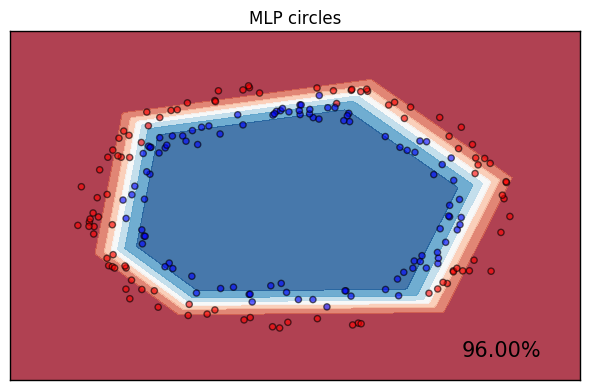

In [6]:
from matplotlib.colors import ListedColormap
ax = plt.subplot(111)

## Specify the colormap:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(mlp, "decision_function"):
    Z = mlp.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

## Plot the test values
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

## Figure parmeters
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

## Title and score report
ax.set_title('MLP circles')
ax.text(xx.max() - .3, yy.min() + .3, ('{0:.2%}'.format(test_score)),
                size=15, horizontalalignment='right')

plt.tight_layout()

### (Optional) Neuron Visualization
We can also visualize the outputs of individual neurons, as an example, let us see what the neurons of the hidden layer really represent. In order to do that, we will use `{xx, yy}` as an input. Note that different activation functions could be used! Also, the outputs of the hidden layers are supposed to be combined in the output layer.

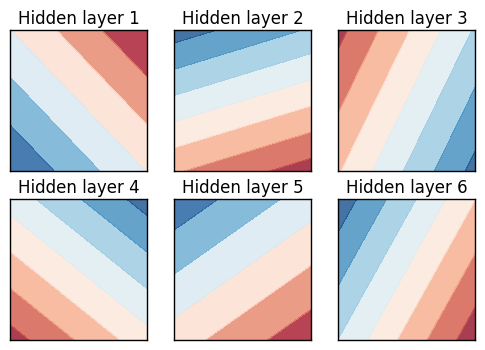

In [7]:
## Step 1: Compute the outputs of the hidden layer
hidden_layer_out = np.dot(np.c_[xx.ravel(), yy.ravel()], mlp.coefs_[-2])
coef_1 = np.diag(mlp.coefs_[-1][:,0])
y_hidden = np.dot(hidden_layer_out, coef_1)

idx = 1
for y_neuron in y_hidden.T:
    y_neuron = y_neuron.reshape(xx.shape)
    ax = plt.subplot(2,3,idx)
    ax.contourf(xx, yy, y_neuron, cmap=cm, alpha=.8)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Hidden layer %d"%idx)
    idx += 1
    